# 处理插画

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import os
import sys

In [299]:
document_path = os.getcwd()+'/插图/'
print(document_path)

/Users/evansong/github_for_EVAN/HealthCare/课程/血糖和糖尿病/插图/


True
(513, 790, 3)


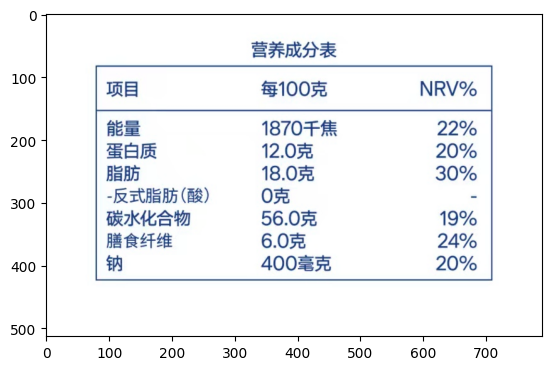

In [348]:
# 读取图像
image_name = 'image-2'
image_path = f'{document_path}/{image_name}.png'
save_image_path = f'{document_path}/{image_name}_renew.png'
print(os.path.exists(image_path))
image = cv2.imread(image_path)
plt.figure()
plt.imshow(image)
print(image.shape)

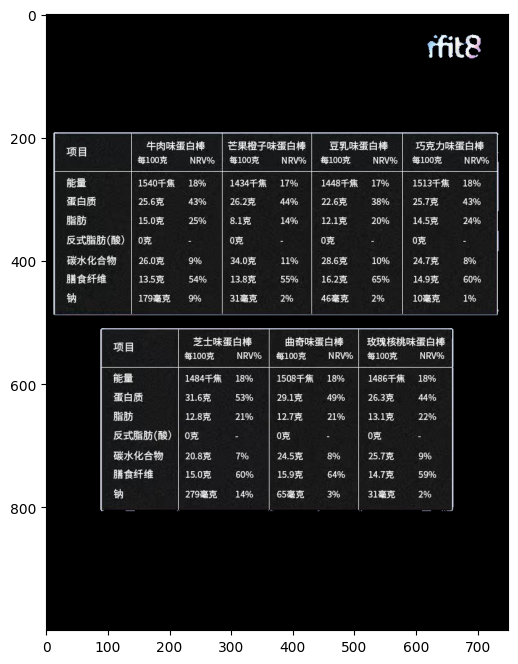

In [327]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 定义红色背景的 HSV 范围 (两个范围)
# 红色的低范围
lower_red_1 = np.array([0, 50, 50])
upper_red_1 = np.array([10, 255, 255])

lower_red_2 = np.array([170, 50, 50])
upper_red_2 = np.array([180, 255, 255])

# 创建掩码：提取红色背景区域
mask_1 = cv2.inRange(hsv_image, lower_red_1, upper_red_1)
mask_2 = cv2.inRange(hsv_image, lower_red_2, upper_red_2)

# 合并两个红色范围的掩码
mask = mask_1 + mask_2

# 反转掩码：保留非红色区域（即前景）
mask_inv = cv2.bitwise_not(mask)

# 提取前景图像，背景设为黑色
foreground = cv2.bitwise_and(image, image, mask=mask_inv)

plt.figure(figsize=(16, 8))
plt.imshow(foreground)

(513, 790)


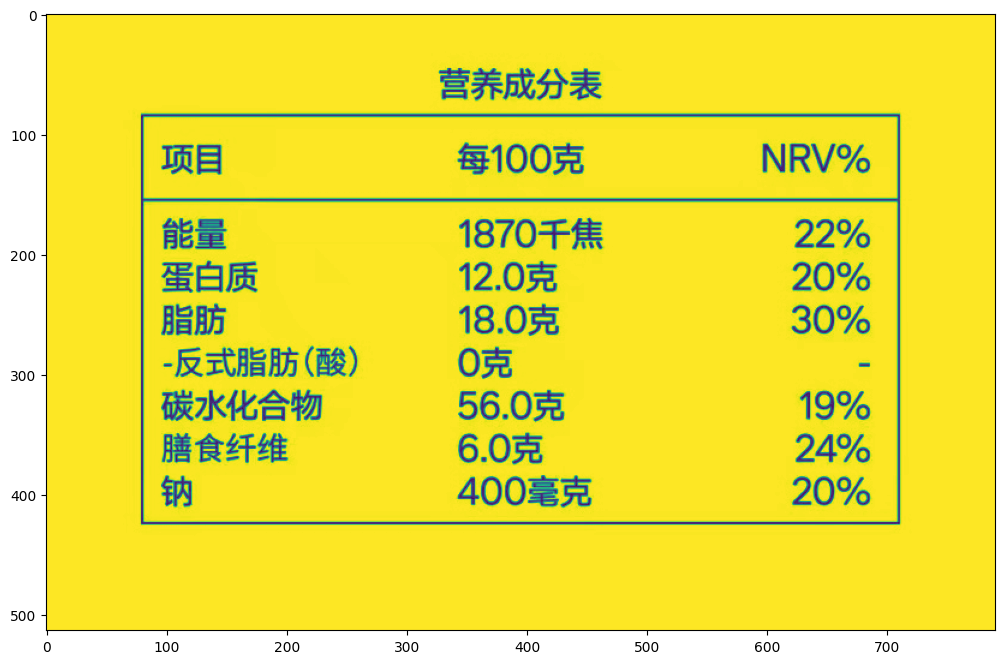

In [350]:
# 转换为灰度图
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(16, 8))
plt.imshow(gray)
print(gray.shape)

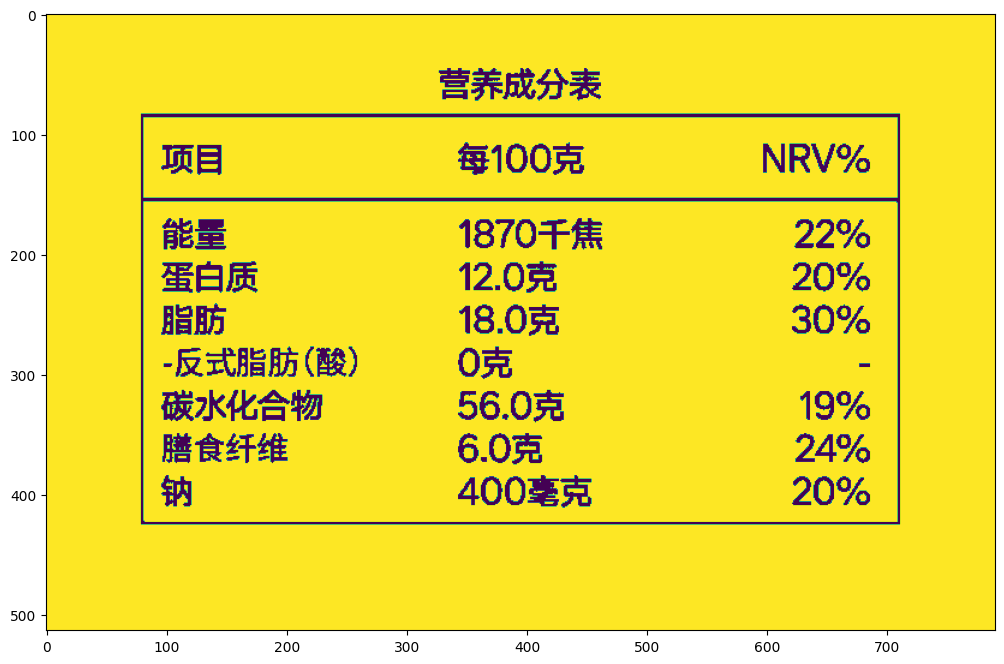

In [351]:
# 去噪：应用高斯模糊来减少图像噪声，平滑图像
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
sharpened = cv2.filter2D(blurred, -1, kernel)

edges = cv2.Canny(sharpened, 50, 100)

# 设置像素值的条件，提取亮度大于200的点
threshold_value = 200

# 创建一张黑色图像，标记这些点
highlight_image = np.zeros_like(edges)
highlight_image[gray > threshold_value] = 255

# 显示标记后的图像
plt.figure(figsize=(20, 8))
plt.imshow(highlight_image)

(1079, 1440)


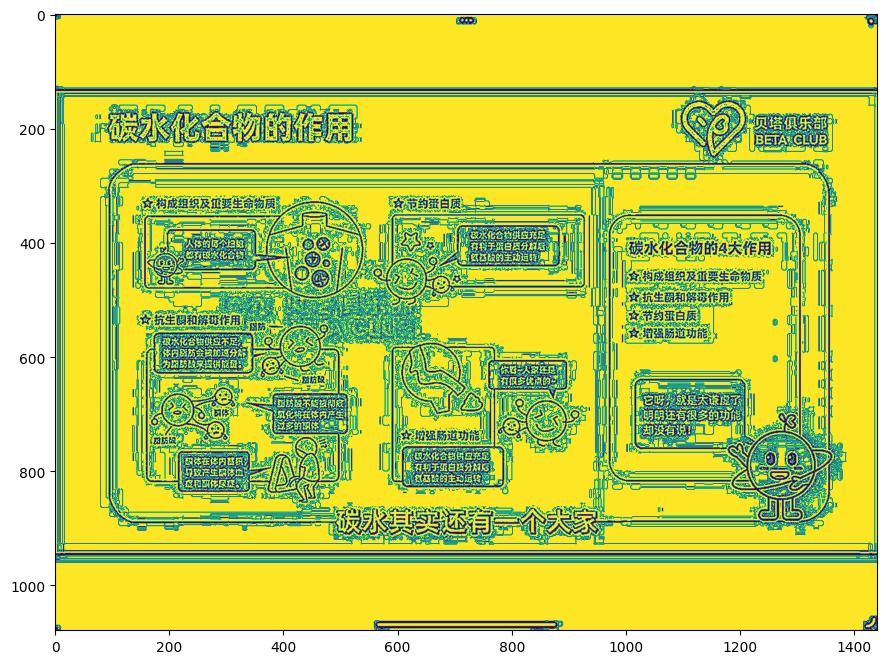

In [226]:
# 自适应阈值：处理局部亮度不均的图像
adaptive_thresh = cv2.adaptiveThreshold(sharpened_2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)
plt.figure(figsize=(16,8))
plt.imshow(adaptive_thresh)
print(adaptive_thresh.shape)

(1000, 750)


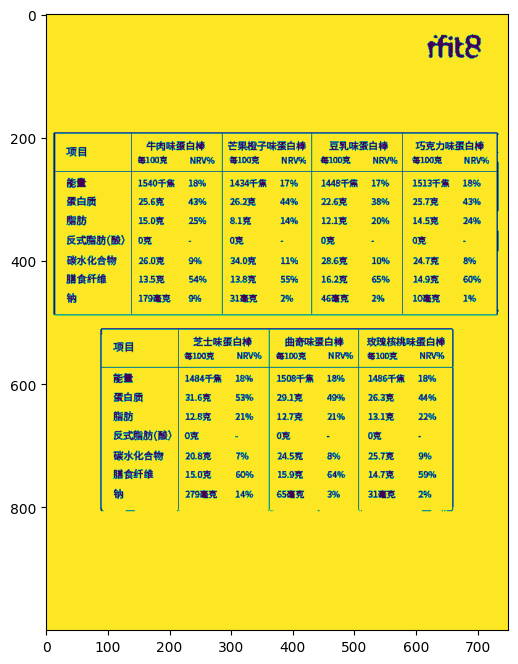

In [329]:
# 二值化处理，设置阈值进行图像分割
_, black_text = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
_, white_text = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(gray, 50, 100)
plt.figure(figsize=(16, 8))
plt.imshow(black_text)
print(edges.shape)

In [330]:
# 查找图像中的轮廓x
kernel = np.ones((3, 3), np.uint8)
dilated_black_text = cv2.dilate(black_text, kernel, iterations=1)
contours, _ = cv2.findContours(black_text, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [337]:
# 创建一个与原图像相同大小的空白图像，初始为全白（255）
output = np.ones_like(image) * 255

In [338]:
# 在新图像上绘制找到的轮廓（文字和边框）
cv2.drawContours(output, contours, -1, (0, 0, 0), thickness=cv2.FILLED)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

处理完成并保存新图像为 processed_image.png


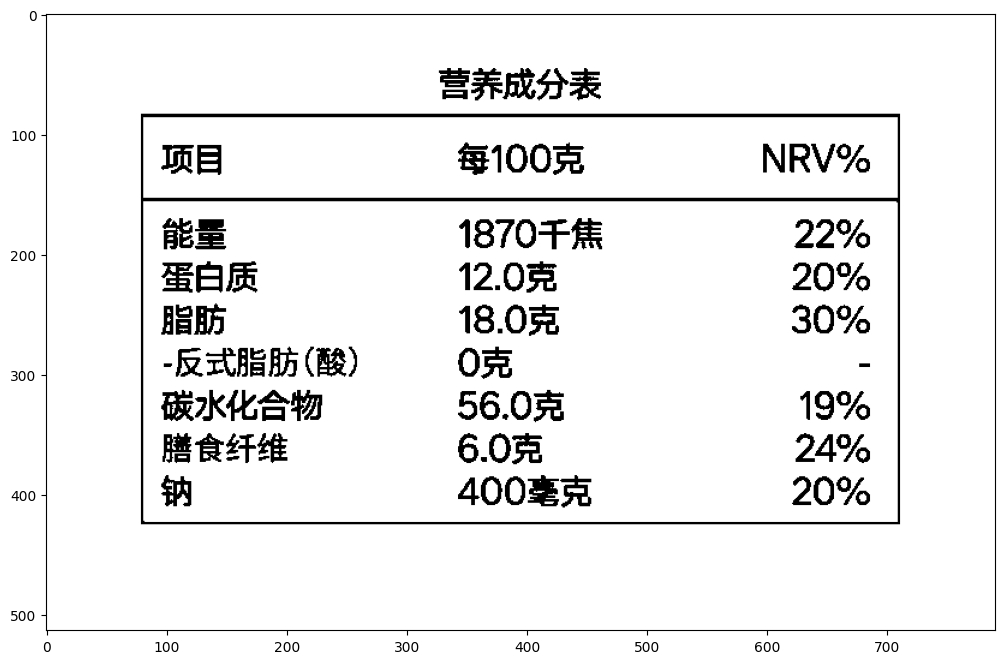

In [352]:
# 使用Pillow保存处理后的图像
output_image = Image.fromarray(cv2.cvtColor(highlight_image, cv2.COLOR_BGR2RGB))
# output_image.save("/mnt/data/processed_image.png")
plt.figure(figsize=(16, 8))
plt.imshow(output_image)
print("处理完成并保存新图像为 processed_image.png")

In [353]:
output_image.save(save_image_path)

In [354]:
save_image_path

'/Users/evansong/github_for_EVAN/HealthCare/课程/血糖和糖尿病/插图//image-2_renew.png'